<a href="https://colab.research.google.com/github/raulbenitez/OUTLIER_DETECTION/blob/main/outlier_detection_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OUTLIER DETECTION METHODS

Topics

1. Parametric methods
1.1 Univariate methods:
  - Interquantile range
  - z-score
  - Median Absolute Deviation (MAD)
  - Statistical tests
1.2 Multivariate methods:
  - Elliptic envelope
  - Gaussian Mixture Models (GMM)

2. Non-parametric methods:
2.1 Univariate (unsupervised)
  - Local Outlier Detection
  - DBSCAN clustering 
2.2 Multivatiate (supervised)
  - Isolation forest
  - One-Class SVM
3. Synthetic Toy datasets


Course materials can be found in the GitHub repository https://github.com/raulbenitez/OUTLIER_DETECTION

Short bio:

Raul Benitez holds a PhD in physics and is professor at the department of Automatic Control of the Universitat Politècnica de Catalunya (Barcelona, Spain). He coordinates a research group in biomedical image processing that applies machine learning methods to recognize patterns in medical images. He is author of more than 30 journal papers, 77 contributions in international conferences and principal investigator of several national and international projects.

https://futur.upc.edu/RaulBeniteziglesias

https://scholar.google.com/citations?user=9arewZYAAAAJ&hl=ca

contact: raul.benitez@upc.edu

# Multivariate Database

https://archive.ics.uci.edu/ml/datasets/South+German+Credit

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/raulbenitez/OUTLIER_DETECTION/main/SouthGermanCredit.asc',sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [8]:
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [9]:
df.shape

(1000, 21)

In [10]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [11]:
df.describe(exclude='category')

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


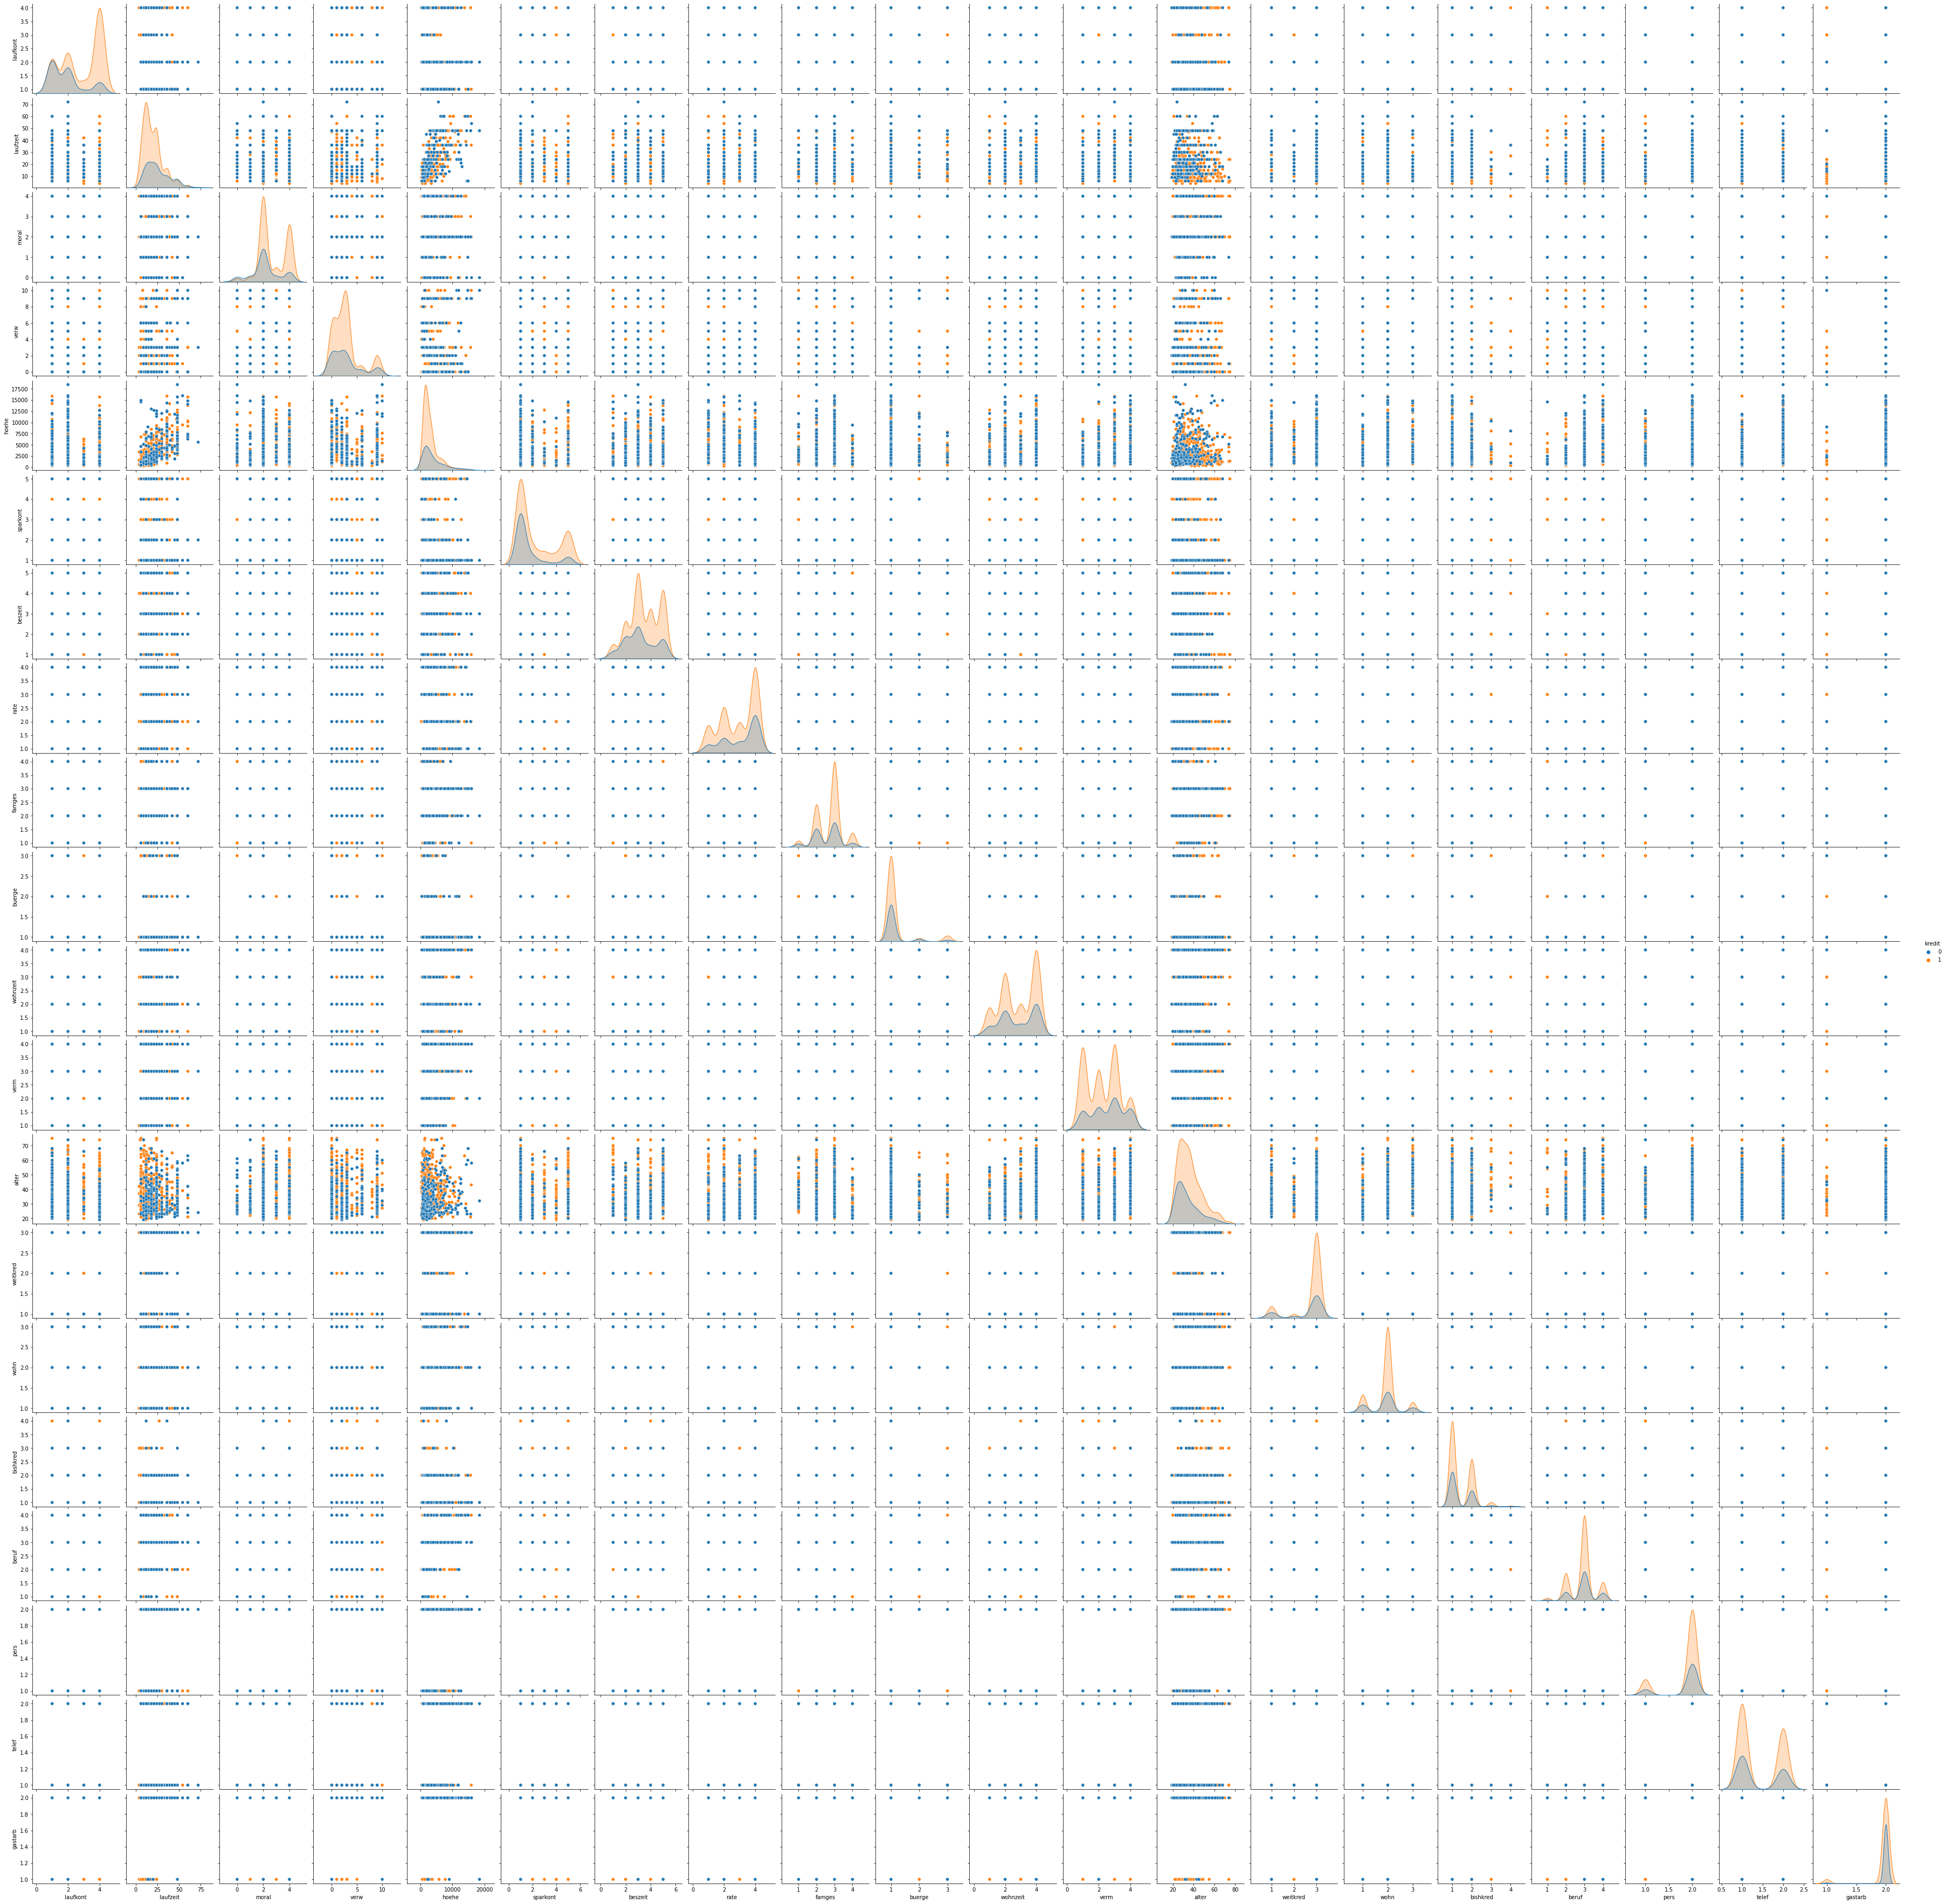

In [12]:
import seaborn as sns

sns.pairplot(df,hue='kredit')

<function matplotlib.pyplot.show>

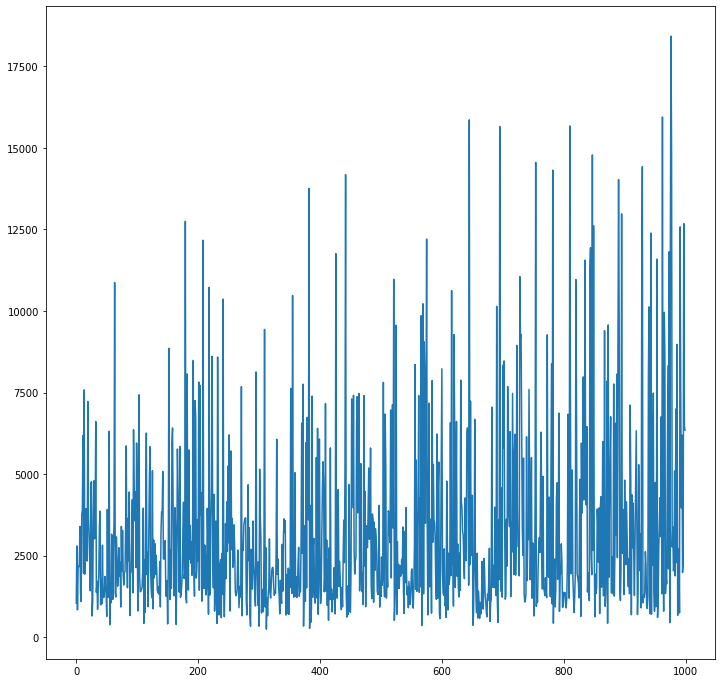

In [13]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,12))
plt.plot(df['hoehe'])
plt.show

<function matplotlib.pyplot.show>

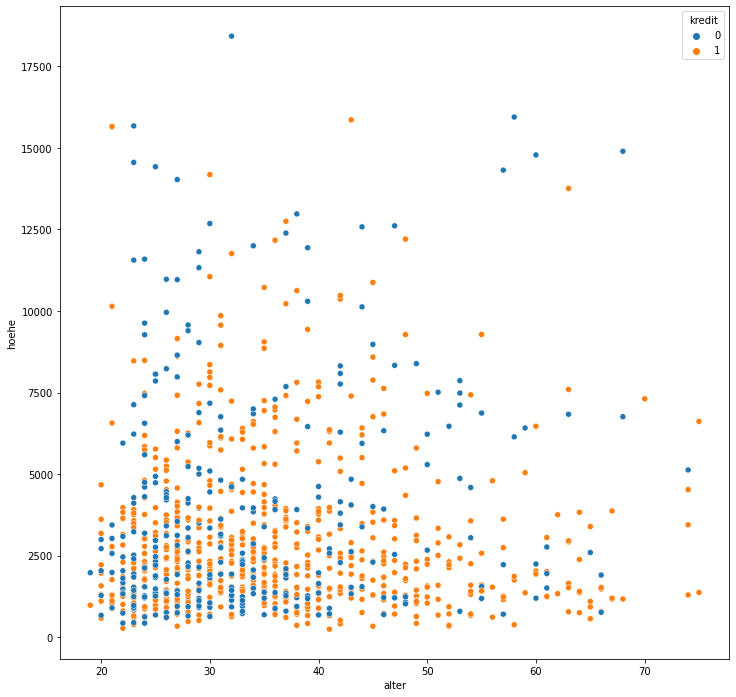

In [14]:
import seaborn as sns

figure = plt.figure(figsize=(12,12))
sns.scatterplot(y='hoehe',x='alter',hue='kredit',data=df)
plt.show

# PARAMETRIC METHODS


## Univariate (unsupervised):


### Interquantile range

$IQR = Q_3 - Q_1$,

Where $Q_i, i=1..$ are the distribution quantiles at $25\%, 50\%, 75\%$ respectively.

An observation x is an outlier if 

$ x < Q1 - 1.5*IQR$ 
 
 or if 

$ x > Q3 + 1.5*IQR$ 

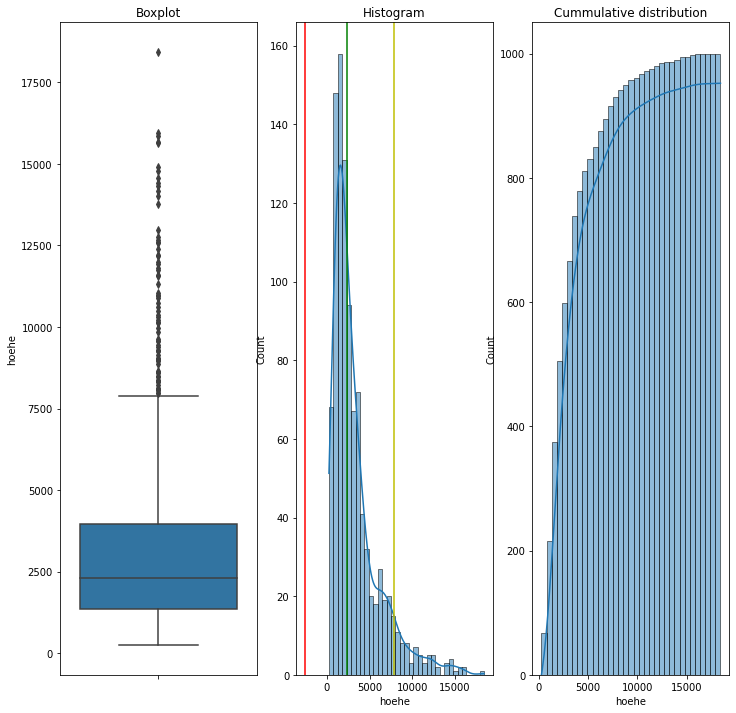

In [22]:
Q1 = df['hoehe'].quantile(.25)
Q2 = df['hoehe'].quantile(.5) # median
Q3 = df['hoehe'].quantile(.75)
IQR = Q3-Q1

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(131)
ax = sns.boxplot(y='hoehe',data=df)
ax.set_title('Boxplot')
ax1 = fig.add_subplot(132)
ax1 = sns.histplot(x='hoehe',data=df,kde=True)
ax1.set_title('Histogram')
ax1 = plt.axvline(Q2, color="g", linestyle="-")
ax1 = plt.axvline(Q1-1.5*IQR, color="r", linestyle="-")
ax1 = plt.axvline(Q3+1.5*IQR, color="y", linestyle="-")
ax2 = fig.add_subplot(133)
ax2 = sns.histplot(x='hoehe',data=df,kde=True,cumulative=True)
ax2.set_title('Cummulative distribution')
plt.show()

In [23]:
df.loc[(df['hoehe']<Q1-1.5*IQR)|(df['hoehe']>Q3+1.5*IQR)]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
63,4,36,3,0,10875,1,5,2,3,1,2,3,45,3,2,2,3,1,2,2,1
152,4,48,4,1,8858,5,4,2,3,1,1,4,35,3,3,2,3,2,2,2,1
179,4,48,3,3,12749,3,4,4,3,1,1,3,37,3,2,1,4,2,2,2,1
182,1,30,0,9,8072,5,2,2,3,1,3,3,25,1,2,3,3,2,1,2,1
192,2,48,2,0,8487,5,4,1,2,1,2,3,24,3,2,1,3,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2,48,0,10,18424,1,3,1,2,1,2,2,32,1,2,1,4,2,2,1,0
977,1,6,2,0,14896,1,5,1,3,1,4,4,68,1,2,1,4,2,2,2,0
986,1,14,2,0,8978,1,5,1,1,1,4,2,45,3,2,1,4,2,2,1,0
991,2,24,2,1,12579,1,5,4,2,1,2,4,44,3,3,1,4,2,2,2,0


Number of outliers 

In [24]:
Noutliers = df.loc[(df['hoehe']<Q1-1.5*IQR)|(df['hoehe']>Q3+1.5*IQR)].shape[0]
print('The IQR method detects {} outliers'.format(Noutliers))

The IQR method detects 72 outliers


In [25]:
lower_outliers = df.loc[(df['hoehe']<Q1-1.5*IQR)]
upper_outliers = df.loc[(df['hoehe']>Q3+1.5*IQR)]

n_outliers = upper_outliers.shape[0] + lower_outliers.shape[0]
n_observations = df.shape[0] 
fraction_outliers = 100*n_outliers/n_observations

print('There are {} upper outliers and {} lower outliers'.format(upper_outliers.shape[0],lower_outliers.shape[0]))
print('The {} % of the observations are outliers'.format(fraction_outliers))

There are 72 upper outliers and 0 lower outliers
The 7.2 % of the observations are outliers


Normality check of the data

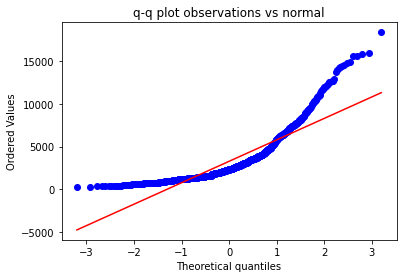

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
res = stats.probplot(df['hoehe'].values, dist=stats.norm, plot=ax)
ax.set_title("q-q plot observations vs normal")
plt.show()

Kolmogorov-Smirov test

In [30]:
from scipy import stats 

(d,p) = stats.kstest(df['hoehe'].values, 'norm')
print('the KS statistic is {} and the p-value for the KS test {}'.format(d,p))
if (p<0.05):
  print('Reject the null hypothesis')
else:
  print('null hypothesis can not be rejected')

the KS statistic is 1.0 and the p-value for the KS test 0.0
Reject the null hypothesis


### Z-score



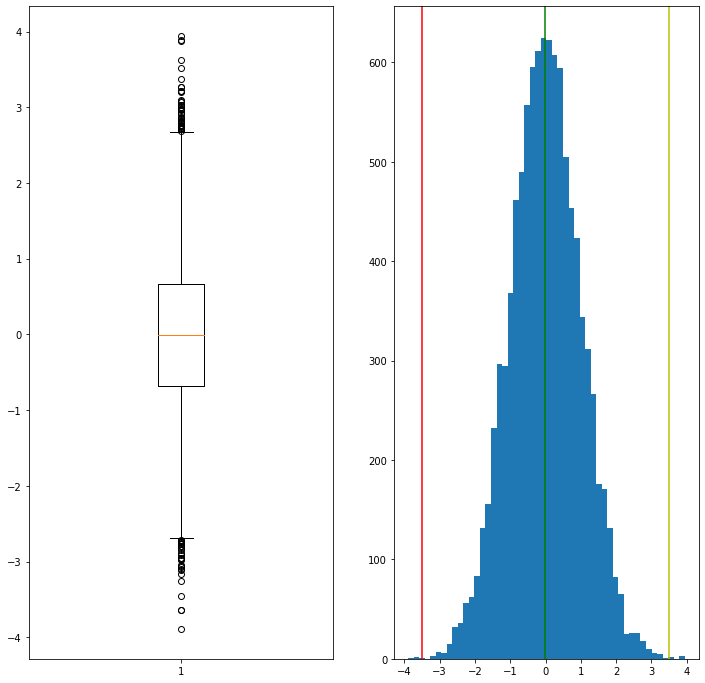

In [45]:
x_normal = stats.norm.rvs(size=10000)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(121)
ax = plt.boxplot(x_normal)
ax1 = fig.add_subplot(122)
ax1 = plt.hist(x_normal,50)
ax1 = plt.axvline(np.mean(x_normal), color="g", linestyle="-")
ax1 = plt.axvline(np.mean(x_normal)-3.5*np.std(x_normal), color="r", linestyle="-")
ax1 = plt.axvline(np.mean(x_normal)+3.5*np.std(x_normal), color="y", linestyle="-")
plt.show()

Define an outlier as an observation that is further than 3.5 standard deviations from the mean. 

In [26]:
mean = df['hoehe'].mean()
std = df['hoehe'].std()

lower_outliers = df.loc[(df['hoehe']<mean-3.5*std)]
upper_outliers = df.loc[(df['hoehe']>mean+3.5*std)]

n_outliers = upper_outliers.shape[0] + lower_outliers.shape[0]
n_observations = df.shape[0] 
fraction_outliers = 100*n_outliers/n_observations

print('There are {} upper outliers and {} lower outliers'.format(upper_outliers.shape[0],lower_outliers.shape[0]))
print('The {} % of the observations are outliers'.format(fraction_outliers))


There are 13 upper outliers and 0 lower outliers
The 1.3 % of the observations are outliers


This is equivalent to rescale and center the data and look for data points which are above a threshold of 3.5


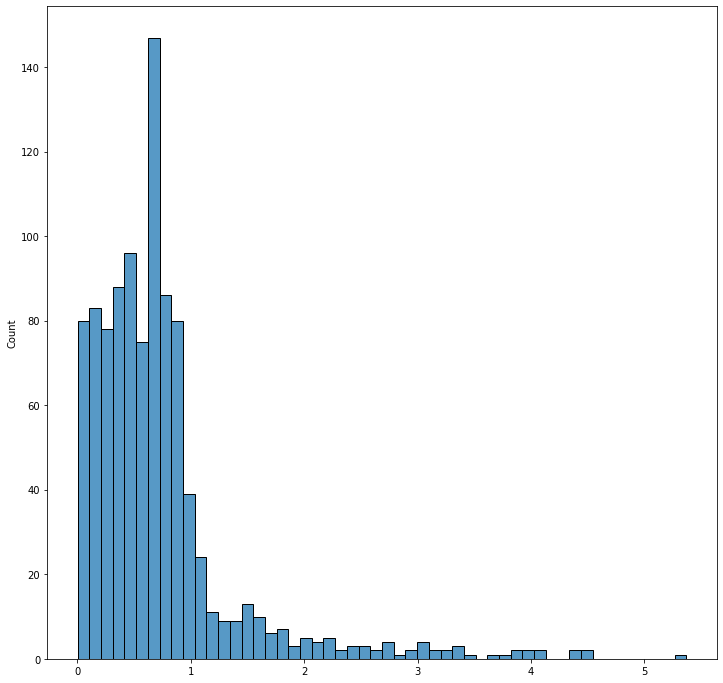

In [27]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['hoehe']))

fig = plt.figure(figsize=(12,12))
sns.histplot(z)
plt.show()


In [28]:
ind_outlier = np.where(z > 3.5)

print('z-score approach')
print('The {} % of the observations are outliers'.format(np.array(ind_outlier).shape[1]))

z-score approach
The 13 % of the observations are outliers


### The Hampel filter (Median Absolute deviation)

Provides a robust estimation of the data variability. The Hampel filter is defined as 

$ x < Q2 - 3*\text{MAD}$ 
 
 or if 

$ x > Q2 + 3*\text{MAD}$ 

where 

$\text{MAD} = \text{median}(|x - Q2|)$


In [31]:
MAD = df['hoehe'].mad()

lower_outliers = df.loc[(df['hoehe']<mean-3*MAD)]
upper_outliers = df.loc[(df['hoehe']>mean+3*MAD)]

n_outliers = upper_outliers.shape[0] + lower_outliers.shape[0]
n_observations = df.shape[0] 
fraction_outliers = 100*n_outliers/n_observations

print('There are {} upper outliers and {} lower outliers'.format(upper_outliers.shape[0],lower_outliers.shape[0]))
print('The {} % of the observations are outliers'.format(fraction_outliers))


There are 46 upper outliers and 0 lower outliers
The 4.6 % of the observations are outliers


Mutual Information: Measuring how imbalanced is a categorical variable

You could use the Shannon entropy as a measure of balance.

Consider a set of n observations of a categorical variable that can take k possible values  If there are $c_i$ observations for each of the k possible values, the Shannon's entropy of the variable is given by: 

$H = - \sum_{i=1}^k p_i \log_2(p_i)$

where p_i = \frac{c_i}{n} is the probability of value k and H is measured in bits per value. 

Shannon's entropy takes a value 0 when there is one single class (completely umbalanced, lowest entropy, maximum predicibility) and 1 when all classes are equally represented (balanced variable, maximum entropy, highest uncertainty).

### Statistical tests for outlier detection

- Grubbs's test
- Dixon's test
- Rosner's test


**Grubb's test**

https://en.wikipedia.org/wiki/Grubbs%27s_test

The Grubbs test allows to detect whether the highest or lowest value in a dataset is an outlier.

The two-sided test 

H0: There are no outliers in the data set

Ha: There is exactly one outlier in the data set (the one furthest from the mean)

The Grubbs test statistic is defined as the largest absolute deviation from the sample mean in units of the sample standard deviation.:

${\displaystyle G={\frac {\displaystyle \max _{i=1,\ldots ,N}\left\vert Y_{i}-{\bar {Y}}\right\vert }{s}}}$
with ${\displaystyle {\overline {Y}}}$ and s denoting the sample mean and standard deviation, respectively. 

The H0 hypothesis of no outliers is rejected at significance level α if

${\displaystyle G>{\frac {N-1}{\sqrt {N}}}{\sqrt {\frac {t_{\alpha /(2N),N-2}^{2}}{N-2+t_{\alpha /(2N),N-2}^{2}}}}}$

In [46]:
G_statistics = np.max(np.abs(df['hoehe'] - df['hoehe'].mean())/df['hoehe'].std())
G_statistics

5.3680781339979236

The critical value is given by

In [47]:
alpha = 0.05
size = df['hoehe'].shape[0]

t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
numerator = (size - 1) * np.sqrt(np.square(t_dist))
denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
G_critical_value = numerator / denominator
print("Grubbs Critical Value: {}".format(G_critical_value))


Grubbs Critical Value: 4.039978163760361


In our case, the G statistic is higher than the critical value and therefore we should reject the null hypothesis and conclude that there's an outlier in the data:

In [ ]:
if (G_statistics > G_critical_value):
  print('reject the null hypothesis of no outliers')

reject the null hypothesis of no outliers


The detected outlier is the one furthest away from the mean

In [48]:
ind_outlier = np.argmax(np.abs(df['hoehe'] - df['hoehe'].mean())/df['hoehe'].std())
print('The detected outlier is located at observation number {}'.format(ind_outlier))

The detected outlier is located at observation number 976


This outlier takes the value

In [49]:
df['hoehe'][ind_outlier]

18424

You can now remove the detected outlier and proceed iteratively to detect outliers in the remaninn subset of observations

**Dixon's Q test**

https://en.wikipedia.org/wiki/Dixon%27s_Q_test

Similar to Dubbs's test but better suited for small sample size samples ($n<25$). It assumes data normality so a normality test is required in advance.

$Q={\frac  {{\text{gap}}}{{\text{range}}}}$ 

Where gap is the absolute difference between the outlier in question and the closest number to it. If Q > Qtable, where Qtable is a reference value corresponding to the sample size and confidence level. 

If you test for the smallest value of the data, start by sorting the data:




In [50]:
df_sorted = df.sort_values(by=['hoehe'],ascending=True)
df_sorted.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
312,4,6,4,0,250,4,3,2,2,1,2,1,41,1,2,2,2,2,1,2,1
383,2,9,2,0,276,1,3,4,4,1,4,1,22,3,1,1,2,2,1,2,1
286,1,6,4,3,338,3,5,4,3,1,4,3,52,3,2,2,3,2,1,2,1
300,1,12,1,8,339,1,5,4,4,1,1,3,45,1,2,1,2,2,1,2,1
373,1,6,2,4,343,1,2,4,2,1,1,1,27,3,2,1,3,2,1,2,1


In [51]:
lowest = df_sorted['hoehe'].values[0]
nearest_neighbour = df_sorted['hoehe'].values[1]

print('The lowest value is {} and its closest neighbour is {}'.format(lowest,nearest_neighbour))

The lowest value is 250 and its closest neighbour is 276


Then Q is defined as

In [52]:
gap = np.abs(lowest - nearest_neighbour)
range = df_sorted['hoehe'].values[-1] - df_sorted['hoehe'].values[0]
Q = gap/range
print('Q = {} '.format(Q))

Q = 0.001430615164520744 


Now take a look to the table of the two-tailed Dixon's Q test at the $95\%$ conficence level


| 3 | 4  | 5  | 6 | 7  | 8  | 9  | 10  |   |
|---|---|---|---|---|---|---|---|---|
| 0.970  | 0.829  | 0.710  |  0.625 | 0.568  |  0.526 |  0.493 | 0.466  |   |



If Q > Q_table then the observation is an outlier. In this example, since the number of observations is larger than 10, we should use a slightly different way to compute the Q and other tables for the critical Q that can be obtained here https://www.statisticshowto.com/dixons-q-test/
https://pubs.acs.org/doi/pdf/10.1021/ac00002a010


## Normality tests and q-q plots

Consider an experimental sequence of observations of a certain process that you want to implement in a Discrete-Event Simulation (DES) model. For instance, you may want to model the arrival of parts to a certain station or the service times of a certain machine. The graphical way to represent the similarity between two distributions is the q-q plot, representing the empirical cummulative distribution function (cdf) of the observations and the theoretical cdf of the assumed distribution. 

The one-sample Kolmogorov-Smirnov test allows to test the distribution F(x) of an observed random variable against a given distribution G(x).

Let's see some examples of how to proceed.



## a) Check if a regular sequence is normally distributed:

In [ ]:
from scipy import stats
import numpy as np

x_grid = np.linspace(0, 1, 100)
x_grid

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Perform the KS test with the null hypothesis that the sample is normally distributted:

In [ ]:
(d,p) = stats.kstest(x_grid, 'norm')
print('the KS statistic is {} and the p-value for the KS test {}'.format(d,p))
if (p<0.05):
  print('Reject the null hypothesis')
else:
  print('null hypothesis can not be rejected')

the KS statistic is 0.5 and the p-value for the KS test 1.2131434371817858e-23
Reject the null hypothesis


Let's visualize with a q-q plot:


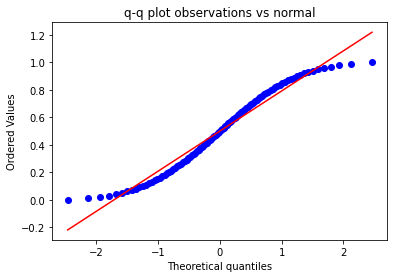

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
res = stats.probplot(x_grid, dist=stats.norm, plot=ax)
ax.set_title("q-q plot observations vs normal")
plt.show()

## b) Check if a uniform sequence is normally distributed:


In [ ]:
x_uniform = stats.uniform.rvs(size=100)
(d,p) = stats.kstest(x_uniform, 'norm')
print('the KS statistic is {} and the p-value for the KS test {}'.format(d,p))
if (p<0.05):
  print('Reject the null hypothesis')
else:
  print('null hypothesis can not be rejected')

the KS statistic is 0.5031003519370061 and the p-value for the KS test 5.960671915397695e-24
Reject the null hypothesis


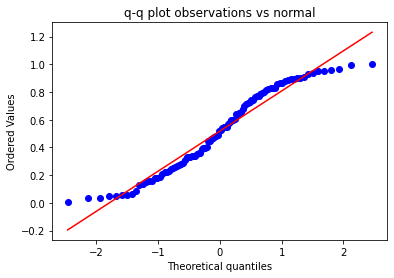

In [ ]:
fig = plt.figure()
ax = plt.axes()
res = stats.probplot(x_uniform, dist=stats.norm, plot=ax)
ax.set_title("q-q plot observations vs normal")
plt.show()

## b) Check if a gaussian sequence is normally distributed:


In [ ]:
x_gaussian = stats.norm.rvs(size=100)
(d,p) = stats.kstest(x_gaussian, 'norm')
print('the KS statistic is {} and the p-value for the KS test {}'.format(d,p))
if (p<0.05):
  print('Reject the null hypothesis')
else:
  print('null hypothesis can not be rejected')

the KS statistic is 0.08217062761249982 and the p-value for the KS test 0.49110006940298945
null hypothesis can not be rejected


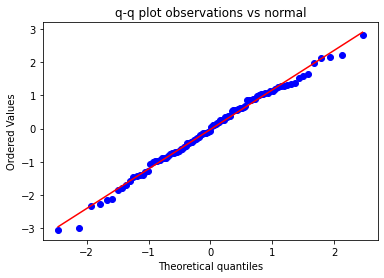

In [ ]:
fig = plt.figure()
ax = plt.axes()
res = stats.probplot(x_gaussian, dist=stats.norm, plot=ax)
ax.set_title("q-q plot observations vs normal")
plt.show()

EXERCISE: (Thanks Miguel Arduengo)

Generate a sequence of 100 observations distributed according to a poisson distribution and check if it follows a Poisson or a Gamma



the KS statistic is 0.00854919438777868 and the p-value for the KS test 0.45787640672323277
null hypothesis can not be rejected


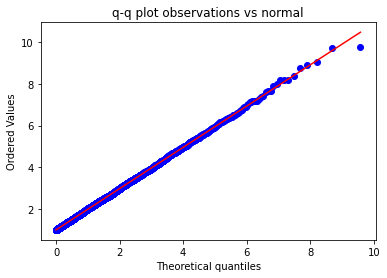

In [ ]:
pr = stats.expon.rvs(1.0,size=10000)
(d,p) = stats.kstest(pr,'expon',args=[1.0])
print('the KS statistic is {} and the p-value for the KS test {}'.format(d,p))
if (p<0.05):
  print('Reject the null hypothesis')
else:
  print('null hypothesis can not be rejected')

fig = plt.figure()
ax = plt.axes()
res = stats.probplot(pr, dist=stats.expon, plot=ax)
ax.set_title("q-q plot observations vs normal")
plt.show()

## Multivariate (unsupervised)

For the multivariate examples, we are going to work with synthetically generated data. 

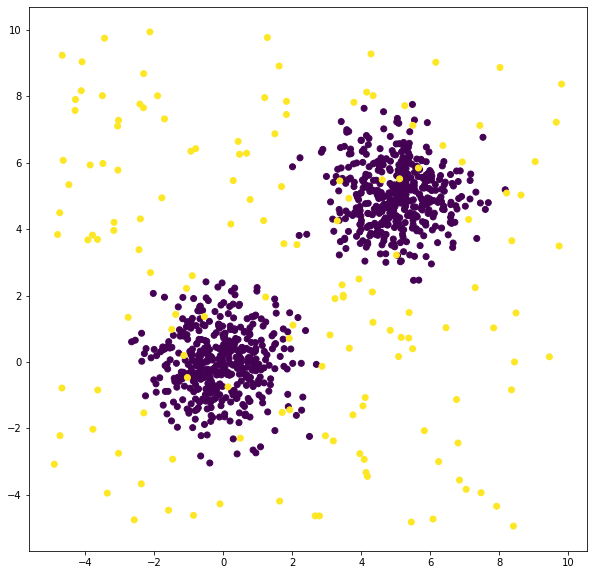

In [61]:
from sklearn.datasets import  make_blobs
import numpy as np
import matplotlib.pyplot as plt

n_samples = 1000
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

X_inliers,y = make_blobs(centers=[[0, 0], [5, 5]], cluster_std=1, n_samples=n_inliers, n_features=2,random_state=0)
X_outliers = np.random.uniform(low=-5, high=10, size=(n_outliers, 2))
X = np.r_[X_inliers, X_outliers]
ground_truth = np.r_[np.zeros(n_inliers), np.ones(n_outliers)]

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=ground_truth)
plt.show()

### Elliptic Envelope

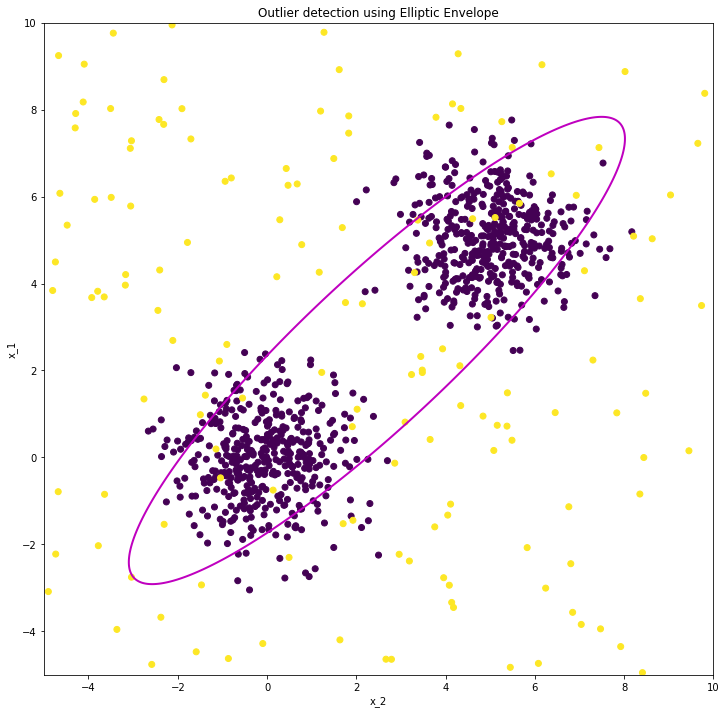

In [62]:
from sklearn.covariance import EllipticEnvelope

clf =  EllipticEnvelope(contamination=0.25)

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-5, 10, 500), np.linspace(-5, 10, 500))

clf.fit(X)
Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

plt.figure( figsize=(12,12))  
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='m')
plt.title("Outlier detection using Elliptic Envelope")
plt.scatter(X[:, 0], X[:, 1], c=ground_truth)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.ylabel("x_1")
plt.xlabel("x_2")
plt.show()

### Gaussian Mixture Models (GMM)

https://scikit-learn.org/stable/modules/mixture.html#mixture


We model the distribution of the multidimensional observations using a mixture of gaussian distributions: 

## $p(\vec{x}) = \sum_{i=1}^G \pi_i N(\vec{\mu_i},\Sigma_i)$

## $\sum_{i=1}^G \pi_i, 0\le \pi_i \le 1$

The GMM parameters are given by $\theta=\{\mu_1,\dots,\mu_G,\Sigma_1,\dots,\Sigma_G,\pi_1,\dots,\pi_G\}$ and are estimated using the Expectation-Maximization algorithm (EM, detailed information can be found at https://stephens999.github.io/fiveMinuteStats/intro_to_em.html). 

We then check the Log-Likelihood function of the model in order to identify outliers. The likelihood function provides the probability of the observed data under the GMM model with parameters $\theta$ (data is fixed, we evaluate the probability of a certain data point is observed from a sample of the model).  

$\mathcal{L}(\theta|\vec{x}_1,…,\vec{x}_n)=\prod_{i=1}^n\sum_{k=1}^G p(\vec{x}_i)$ (Likelihood function) 

$\log \mathcal{L}(\theta|\vec{x}_1,…,\vec{x}_n)=\sum_{i=1}^n \log \sum_{k=1}^G p(\vec{x}_i)$ (Log-likelihood function) 


A. Reddy et al., "Using Gaussian Mixture Models to Detect Outliers in Seasonal Univariate Network Traffic," 2017 IEEE Security and Privacy Workshops (SPW), 2017, pp. 229-234, doi: 10.1109/SPW.2017.9.

https://ieeexplore.ieee.org/document/8227312


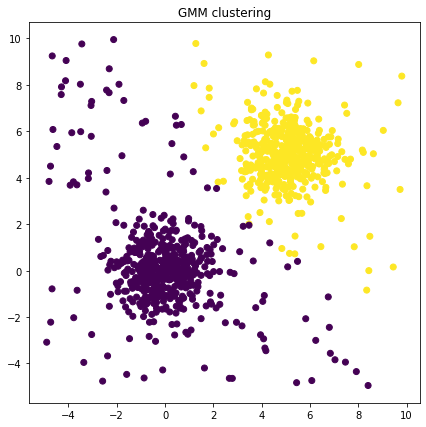

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=2,covariance_type='full')

plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("GMM clustering")
plt.show()

The likelihood function provides the probability of the observed data under the GMM model, and can be used to identify outliers as observations with a lower value of the likelihood function. 

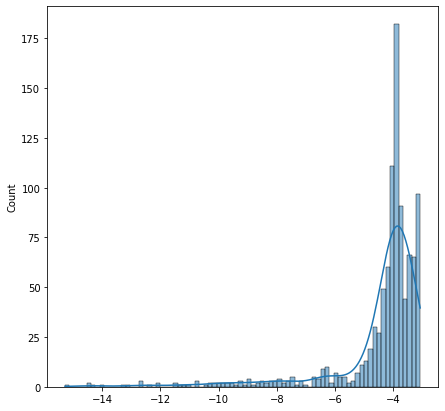

In [64]:
plt.figure(figsize=(7,7))
loglike = gmm.score_samples(X)
sns.histplot(loglike,kde=True)
plt.show()

Idenfity low likehood samples

In [65]:
thres_LL = -5
ind_lowLL = np.where(loglike < thres_LL)
ind_lowLL

(array([ 29,  37,  56,  62,  90, 200, 203, 207, 273, 321, 362, 406, 428,
        452, 579, 591, 592, 602, 699, 721, 753, 787, 815, 850, 851, 852,
        853, 854, 855, 856, 857, 858, 860, 861, 862, 863, 864, 865, 866,
        867, 868, 869, 871, 872, 873, 875, 876, 877, 878, 879, 880, 881,
        883, 885, 886, 887, 888, 891, 892, 893, 894, 897, 898, 899, 900,
        901, 902, 904, 905, 907, 908, 909, 911, 912, 913, 914, 915, 916,
        917, 918, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931,
        932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 945,
        946, 947, 948, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960,
        961, 962, 964, 966, 967, 968, 969, 970, 971, 973, 974, 975, 976,
        977, 979, 981, 983, 984, 986, 987, 989, 991, 992, 993, 995, 996,
        997, 998, 999]),)

Represent those samples as outliers

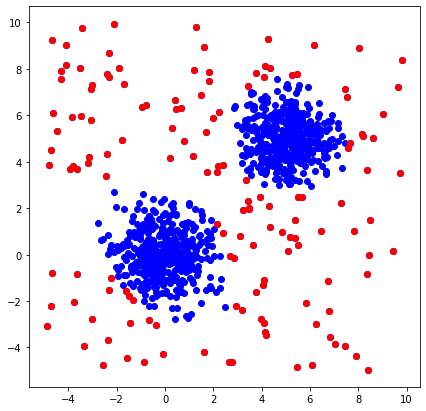

In [66]:
plt.figure(figsize=(7,7))
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.scatter(X[ind_lowLL, 0], X[ind_lowLL, 1], c='r')
plt.show()

### How many clusters? Model selection in GMM 

[9674.685229421246]
[9674.685229421246, 9694.74636638684]
[9674.685229421246, 9694.74636638684, 9733.221692337966]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754, 9820.994593390617]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754, 9820.994593390617, 9861.563128812642]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754, 9820.994593390617, 9861.563128812642, 9895.883899169065]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754, 9820.994593390617, 9861.563128812642, 9895.883899169065, 9938.990452745067]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754, 9820.994593390617, 9861.563128812642, 9895.883899169065, 9938.990452745067, 9976.083837359072]
[9674.685229421246, 9694.74636638684, 9733.221692337966, 9778.857981876754, 9820.994593390617, 9861.563128812642, 9895.883899169065, 9938.990452

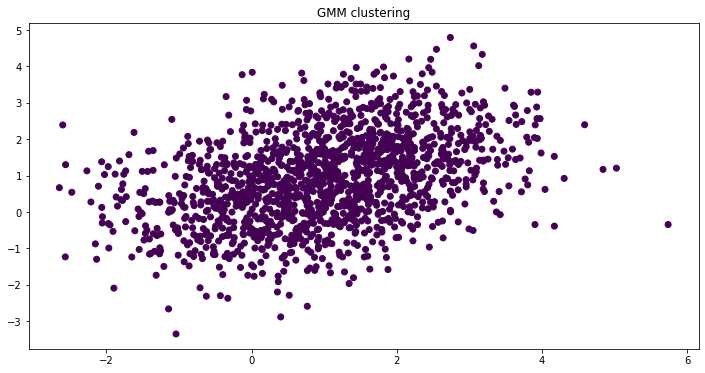

In [92]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate data:
n_clusters = 3
n_samples = 1500
random_state = 170
# X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2,random_state=random_state)
X, y = make_blobs(centers=[[0, 0], [1, 1], [2,2]], n_samples=n_samples, n_features=2,random_state=random_state)

# Fit different GMM and check BIC parsimony index:
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)

fig = plt.figure(figsize=(12,6))
y_pred_gmm = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_gmm)
plt.title("GMM clustering")
plt.show()

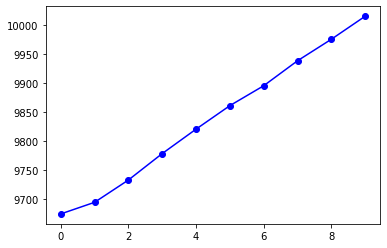

In [93]:
plt.plot(bic,'bo-')

# NONPARAMETRIC METHODS



## Multivariate unsupervised

### Local Outlier detection 

The local outlier factor (LOF) is a measure of the local density deviation of a given data point with respect to its neighbors. A potential outlier will present lower density than its neighbors. 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

Liu, Fei Tony, Ting, Kai Ming and Zhou, Zhi-Hua. “Isolation forest.” Data Mining, 2008. ICDM’08. Eighth IEEE International Conference on.

Liu, Fei Tony, Ting, Kai Ming and Zhou, Zhi-Hua. “Isolation-based anomaly detection.” ACM Transactions on Knowledge Discovery from Data (TKDD) 6.1 (2012): 3.


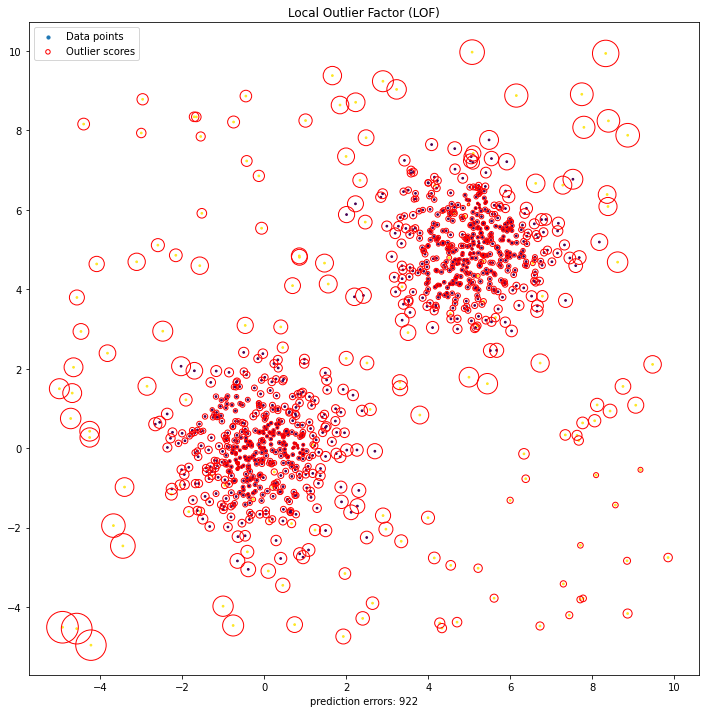

In [68]:
from sklearn.neighbors import LocalOutlierFactor

n_samples = 1000
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

X_inliers,y = make_blobs(centers=[[0, 0], [5, 5]], cluster_std=1, n_samples=n_inliers, n_features=2,random_state=0)
X_outliers = np.random.uniform(low=-5, high=10, size=(n_outliers, 2))
X = np.r_[X_inliers, X_outliers]
ground_truth = np.r_[np.zeros(n_inliers), np.ones(n_outliers)]


clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,12))  

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], c=ground_truth,s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')

plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

## DBSCAN clustering 

https://towardsdatascience.com/dbscan-a-density-based-unsupervised-algorithm-for-fraud-detection-887c0f1016e9

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


DBSCAN clustering parameters are:
- eps:  specifies the distance between two points i.e., how close the data points should be to one another to be considered part of a cluster
- min_samples: specifies the minimum number of neighbors a point should have in a cluster.

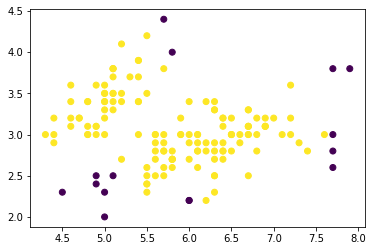

In [70]:
data = df[["sepal_length", "sepal_width"]]
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)
plt.show()

In [71]:
outliers = data[model.labels_ == -1]
outliers.head()

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
41,4.5,2.3
57,4.9,2.4
60,5.0,2.0


Exercise: Apply DBSCAN method to make_blobs data and play

## Multivariate supervised

### Isolation forest 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest


Use a Radom Forest classifier to identify outliers. The procedure is to isolate observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. This path length, averaged over a forest of such random trees provides a measure of how likely is that an observation is an outlier. 


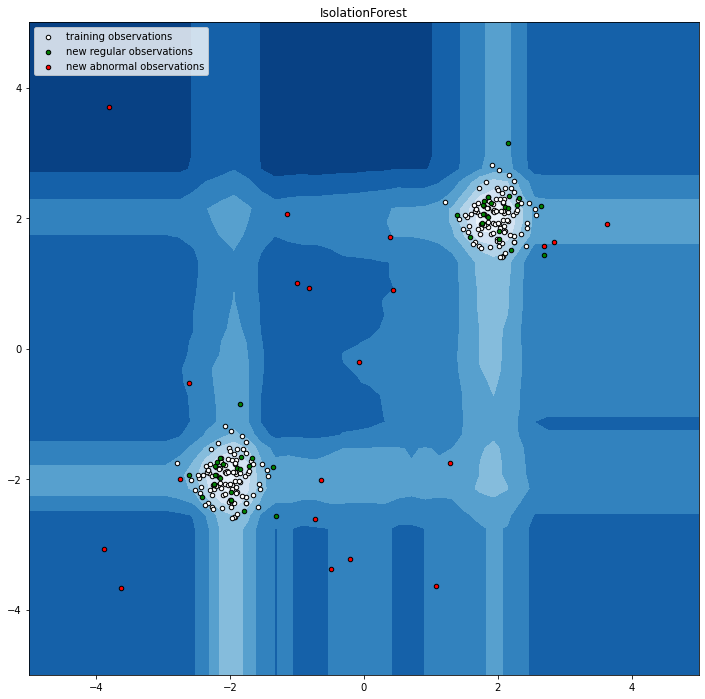

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,12))  
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

Rotated Isolation Forests

https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/

### One-class SVM 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

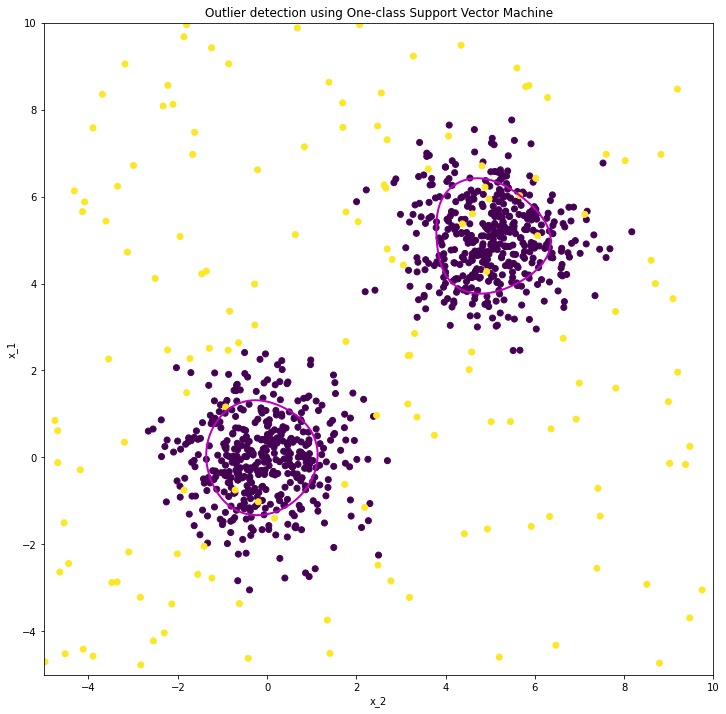

In [82]:
from sklearn.svm import OneClassSVM

n_samples = 1000
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

X_inliers,y = make_blobs(centers=[[0, 0], [5, 5]], cluster_std=1, n_samples=n_inliers, n_features=2,random_state=0)
X_outliers = np.random.uniform(low=-5, high=10, size=(n_outliers, 2))
X = np.r_[X_inliers, X_outliers]
ground_truth = np.r_[np.zeros(n_inliers), np.ones(n_outliers)]


clf = OneClassSVM(kernel = 'rbf',nu=0.5, gamma=0.35)

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-5, 10, 500), np.linspace(-5, 10, 500))

clf.fit(X)
Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

plt.figure( figsize=(12,12))  
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='m')
plt.title("Outlier detection using One-class Support Vector Machine")
plt.scatter(X[:, 0], X[:, 1], c=ground_truth)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.ylabel("x_1")
plt.xlabel("x_2")
plt.show()

# SYNTHETIC TOY DATASETS

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

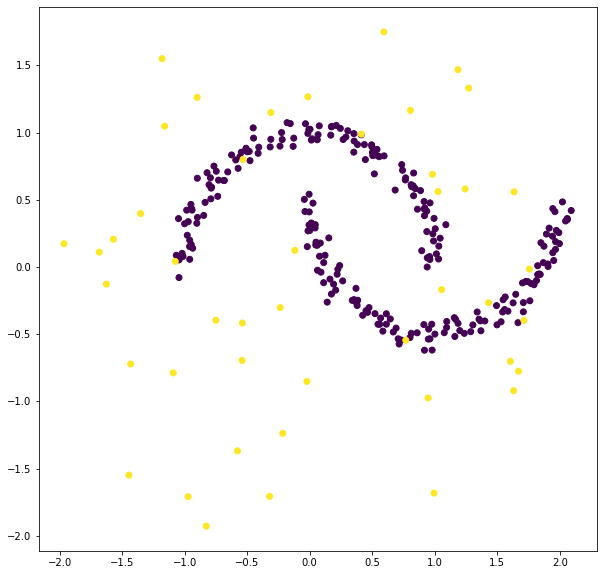

In [83]:
from sklearn.datasets import make_moons

n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

X_inliers,y = make_moons(n_samples=n_inliers, noise=.05, random_state=0)
X_outliers = np.random.uniform(low=-2, high=2, size=(n_outliers, 2))
X = np.r_[X_inliers, X_outliers]
ground_truth = np.r_[np.zeros(n_inliers), np.ones(n_outliers)]

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=ground_truth)
plt.show()